In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

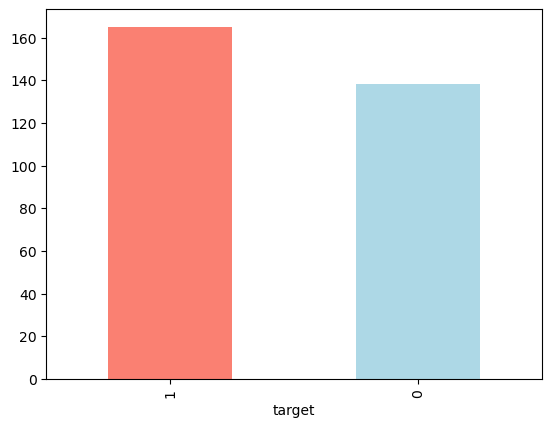

In [3]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

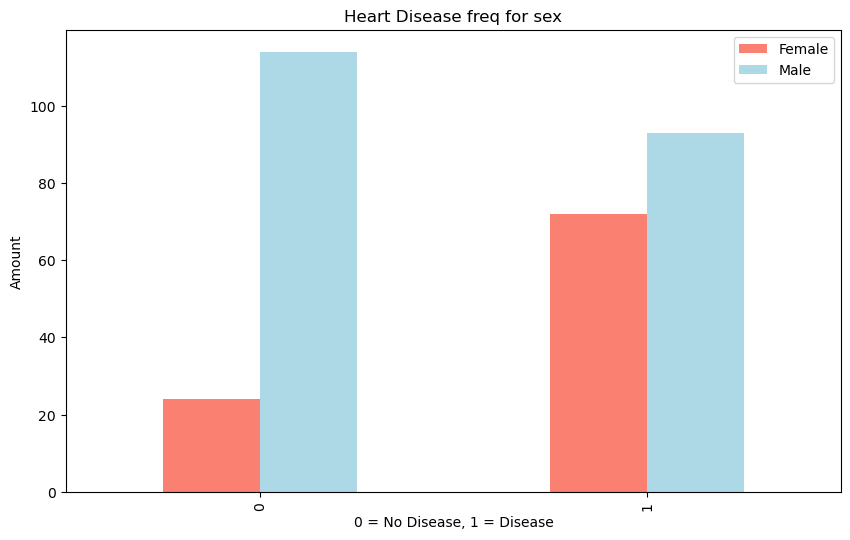

In [6]:
# Compare relation of sex with target 0 is F, 1 is M
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease freq for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

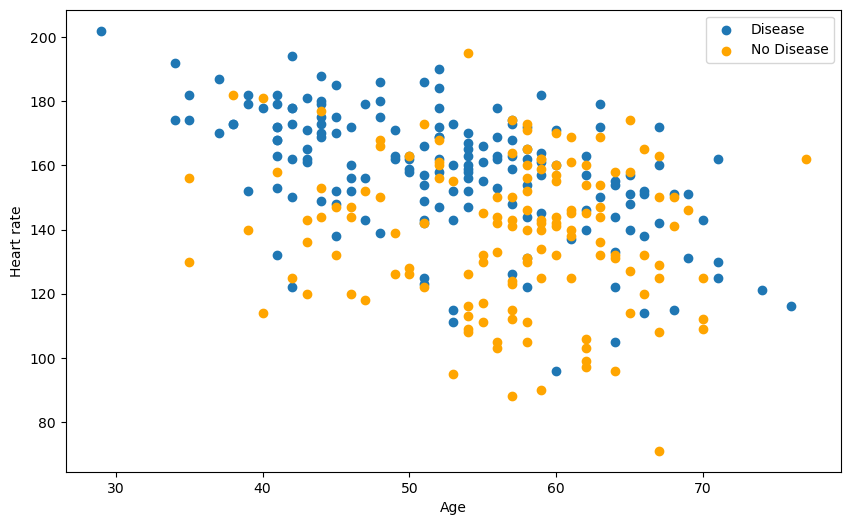

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1])
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="orange")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(["Disease", "No Disease"])

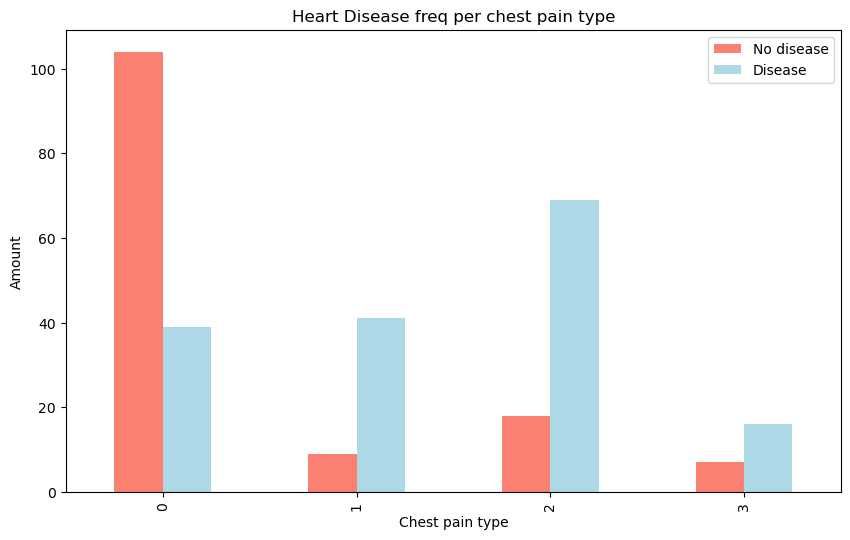

In [8]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease freq per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])

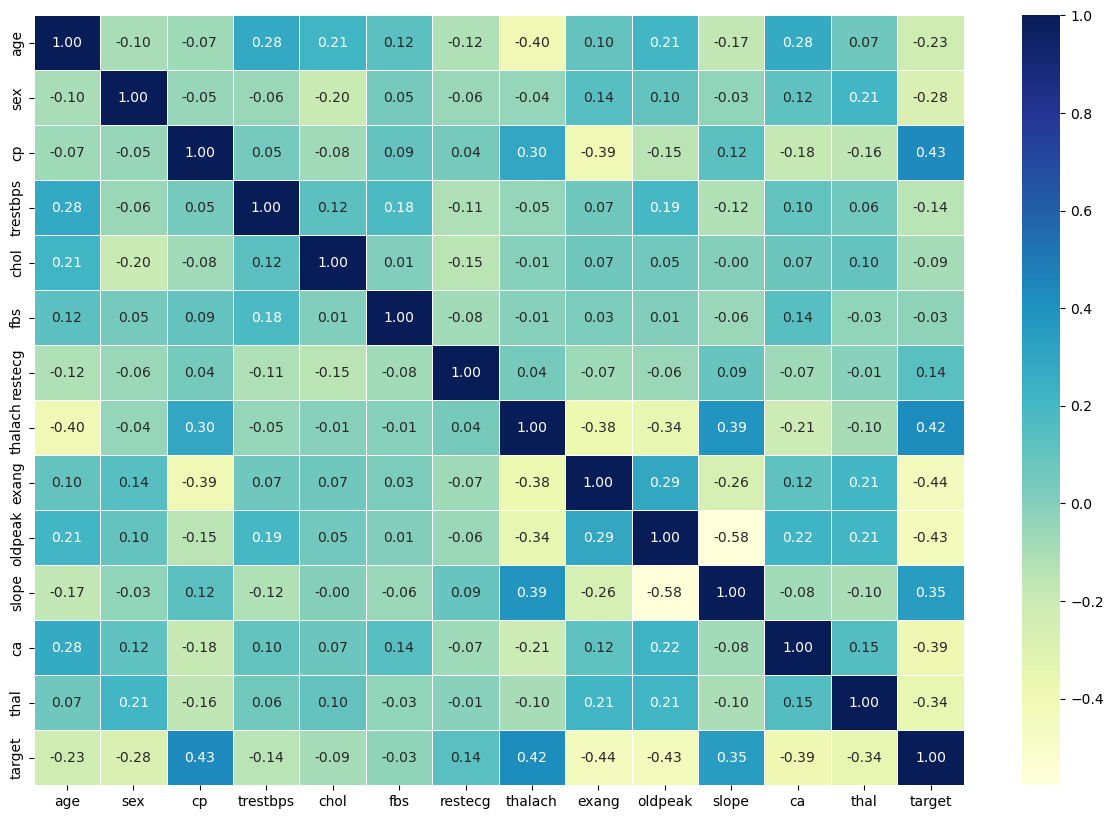

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [42]:
x = df.drop("target", axis=1)
y = df["target"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [43]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, xTrain, xTest, yTrain, yTest):
    model_scores = {}
    for name, model in models.items():
        model.fit(xTrain, yTrain)
        model_scores[name] = model.score(xTest, yTest)
    return model_scores

In [44]:
model_scores = fit_and_score(models=models,
                             xTrain=xTrain,
                             xTest=xTest,
                             yTrain=yTrain,
                             yTest=yTest)
model_scores

c:\Users\famee\OneDrive\Desktop\ML-project-1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.7704918032786885}

<Axes: >

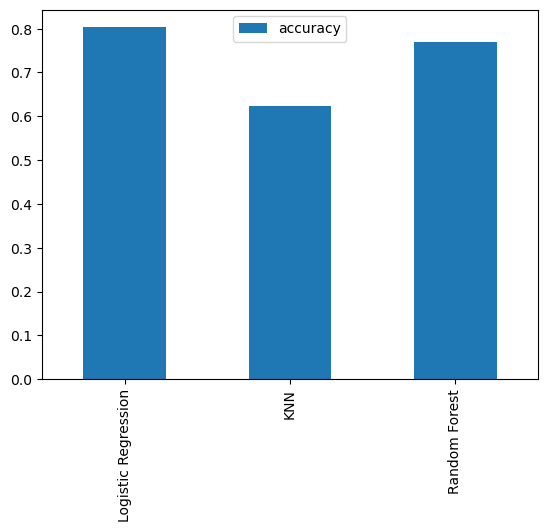

In [45]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [46]:
trainScores = []
testScores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    trainScores.append(knn.score(xTrain, yTrain))
    testScores.append(knn.score(xTest, yTest))

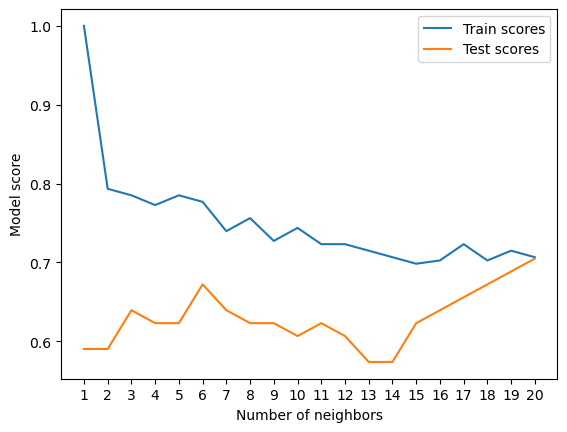

In [47]:
plt.plot(neighbors, trainScores, label="Train scores")
plt.plot(neighbors, testScores, label="Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [48]:
# hyperparam grid for logisticregression
logregGrid = {"C": np.logspace(-4, 4, 20),
              "solver": ["liblinear"]}
# hyperparam grid for randomforestclassifier
rfGrid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [49]:
logregRS = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=logregGrid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
logregRS.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
logregRS.score(xTest, yTest)

0.819672131147541

In [52]:
rfRS = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rfGrid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rfRS.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
rfRS.best_params_

{'n_estimators': 310,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': 10}

In [54]:
rfRS.score(xTest, yTest)

0.7868852459016393

In [58]:
logregGrid2 = {"C": np.logspace(-4, 4, 30),
              "solver": ["liblinear"]}
logregGS = GridSearchCV(LogisticRegression(),
                              param_grid=logregGrid2, 
                              cv=5, 
                              verbose=True)
logregGS.fit(xTrain, yTrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [60]:
logregGS.score(xTest, yTest)

0.819672131147541

In [61]:
yPreds = logregGS.predict(xTest)
yPreds

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

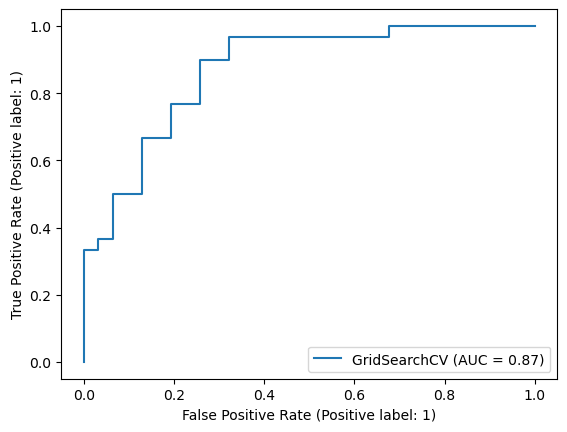

In [66]:
RocCurveDisplay.from_estimator(logregGS, xTest, yTest)

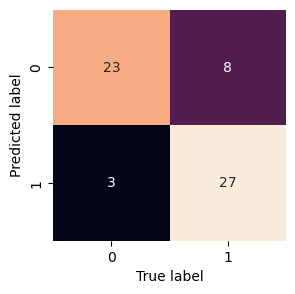

In [68]:
def plot_conf_mat(yTest, yPreds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax =sns.heatmap(confusion_matrix(yTest, yPreds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(yTest, yPreds)

In [69]:
logregGS.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [72]:
clf = LogisticRegression(C=1.3738237958832638,
                         solver="liblinear")
cvAcc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cvAcc = np.mean(cvAcc)
cvAcc

0.8215300546448088

In [74]:
cvPre = cross_val_score(clf, x, y, cv=5, scoring="precision")
cvPre = np.mean(cvPre)
cvPre

0.817900063251107

In [75]:
cvRec = cross_val_score(clf, x, y, cv=5, scoring="recall")
cvRec = np.mean(cvRec)
cvRec

0.8727272727272727

In [76]:
cvF1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cvF1 = np.mean(cvF1)
cvF1

0.8431741323998502

<Axes: title={'center': 'Cross-validated classification metrics'}>

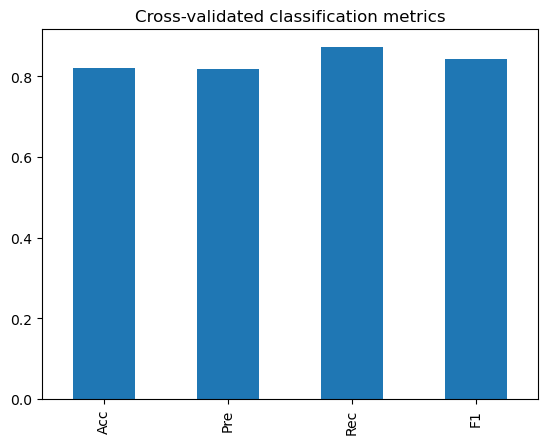

In [77]:
cvMetrics = pd.DataFrame({"Acc": cvAcc,
                          "Pre": cvPre,
                          "Rec": cvRec,
                          "F1": cvF1},
                          index=[0])
cvMetrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

In [82]:
clf = LogisticRegression(C=1.3738237958832638,
                         solver="liblinear")
clf.fit(xTrain, yTrain)
clf.coef_

array([[ 1.52080912e-02, -1.70965569e+00,  7.45481301e-01,
        -2.12858854e-02, -7.19394878e-04,  2.04611223e-01,
         6.72967730e-01,  3.28035598e-02, -9.72129214e-01,
        -4.64304981e-01,  5.90629472e-01, -6.15103625e-01,
        -1.13875064e+00]])

In [81]:
featureDict = dict(zip(df.columns, list(clf.coef_[0])))
featureDict

{'age': 0.015208091174079673,
 'sex': -1.7096556866514276,
 'cp': 0.7454813012331177,
 'trestbps': -0.02128588543903724,
 'chol': -0.0007193948777402957,
 'fbs': 0.20461122343784463,
 'restecg': 0.6729677295617474,
 'thalach': 0.032803559834818544,
 'exang': -0.9721292139780865,
 'oldpeak': -0.46430498146428434,
 'slope': 0.5906294718758459,
 'ca': -0.6151036250882072,
 'thal': -1.1387506373401235}

<Axes: title={'center': 'Feature importance'}>

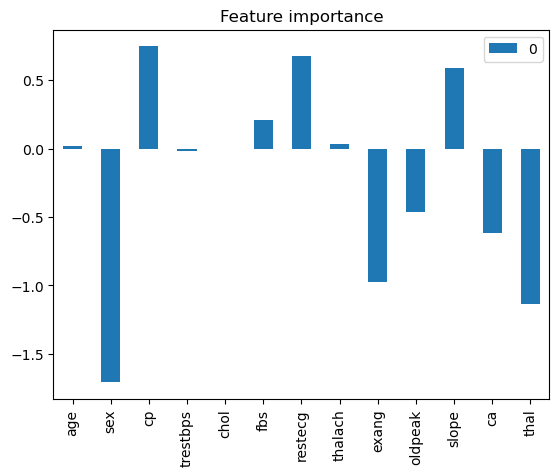

In [83]:
featureDF = pd.DataFrame(featureDict, index=[0])
featureDF.T.plot.bar(title="Feature importance")